# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Aghnia Azka Privanna]
- **Email:** [azkaprivanna@student.ub.ac.id]
- **ID Dicoding:** [aghniaazkap]

## Menentukan Pertanyaan Bisnis

- Seberapa banyak penyewa sepeda yang memilih registered dibandingkan casual?
- Bagaimana peran cuaca (weathersit) terhadap jumlah penyewaan sepeda?
- Bagaimana perubahan tren penyewaan sepeda ketika workingday, weekday, dan holiday?
- Bagaimana tren penyewaan sepeda dalam 1 tahun? Manakah yang lebih unggul antara tahun 2011 atau 2012?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

In [ ]:
path_dataset1 = "/content/day.csv"

In [ ]:
path_dataset2 = "/content/hour.csv"

In [ ]:
df_day= pd.read_csv(path_dataset1)
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour= pd.read_csv(path_dataset2)
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Data Type**

In [ ]:
print('Dataframe day:')
print(df_day.info())

print('\nDataframe hour:')
print(df_hour.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 

Dari output diatas, terdapat kesalahan tipe data pada kolom dteday yang seharusnya memiliki tipe data datetime

**Missing Value**

In [ ]:
print('Jumlah Duplikasi (day):')
print(df_day.isnull().sum())

print('\nJumlah Duplikasi (hour):')
print(df_hour.isnull().sum())

Jumlah Duplikasi (day):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Duplikasi (hour):
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Dari output kode diatas, tidak ada terjadinya missing value

**Duplicate Data**

In [ ]:
print('Jumlah duplikasi day:', df_day.duplicated().sum())
print('Jumlah duplikasi hour:', df_hour.duplicated().sum())

Jumlah duplikasi day: 0
Jumlah duplikasi hour: 0


Ouput kode diatas menunjukkan tidak ada data yang duplicate

In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Melakukan beberapa cleaning data:


*   Menghapus kolom instant karena tidak dibutuhkan
*   Mengubah tipe data 'dteday' dari object menjadi datetime
*   Mengkonversi isi kolom supaya lebih mudah dipahami
*   Mengubah tipe data ke categorial







**Delete Instant Column**

In [ ]:
df_day.drop(['instant'], axis=1, inplace=True)
df_hour.drop(['instant'], axis=1, inplace=True)

**Change the Data Type**

In [ ]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
print(df_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB
None


In [ ]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

**Column Content Conversion**

In [ ]:
df_day.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
df_hour.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

In [ ]:
df_day.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
df_hour.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

In [ ]:
df_day.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
df_hour.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

In [ ]:
df_day.weathersit.replace((1,2,3,4), ('Clear','Misty','Light Snow/Rain','Heavy_rainsnow'), inplace=True)
df_hour.weathersit.replace((1,2,3,4), ('Clear','Misty','Light Snow/Rain','Heavy_rainsnow'), inplace=True)

In [ ]:
df_day.yr.replace((0,1), ('2011','2012'), inplace=True)
df_hour.yr.replace((0,1), ('2011','2012'), inplace=True)

In [ ]:
columns = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

for column in columns:
    df_day[column] = df_day[column].astype('category')
    df_hour[column] = df_hour[column].astype('category')

In [ ]:
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,Jan,0,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sunday,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore Statistical Parameter

In [ ]:
df_day.describe(include="all")

<ipython-input-88-202ba9014e68>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,2,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,2012,Jan,0.0,Monday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,366,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [ ]:
df_hour.describe(include="all")

<ipython-input-89-29824b046db5>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,4,2,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,2012,Jul,NaN,0.0,Saturday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,4496,8734,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [ ]:
# melihat total penyewa sepeda berdasarkan jam
df_hour.groupby(by='hr').agg({
    'cnt': ['sum']
})

,cnt
,sum
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Dari output di atas, dapat diketahui:
- Penyewaan sepeda paling rendah: pukul 04.00
- Penyewaan sepeda paling tinggi: pukul 17.00

In [ ]:
# melihat jumlah penyewaan tiap season
df_day.groupby(by='season').cnt.sum().sort_values(ascending=False).reset_index().head(10)

,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Urutan penyewa sepeda secara ascending sesuai seasonnya adalah Fall-Summer-Winter-Spring

In [ ]:
# mengelompokkan penyewa casual dan registered tiap tahun
df_day.groupby(by='yr').agg({
    'registered': ['sum'],
    'casual': ['sum']
})

,registered,casual
,sum,sum
yr,,
2011,995851,247252
2012,1676811,372765


Penyewa registered selalu lebih banyak dibandingkan penyewa casual dilihat dari tahun 2011 dan 2012. Selain itu, bertambahnya tahun, jumlah penyewa sepeda semakin banyak

In [ ]:
# mengelompokkan penyewa sepeda berdasarkan bulan
df_day.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
       max   min         mean     sum
mnth                                 
Jan   4521   431  2176.338710  134933
Feb   5062  1005  2655.298246  151352
Mar   8362   605  3692.258065  228920
Apr   7460   795  4484.900000  269094
May   8294  2633  5349.774194  331686
Jun   8120  3767  5772.366667  346342
Jul   8173  3285  5563.677419  344948
Aug   7865  1115  5664.419355  351194
Sep   8714  1842  5766.516667  345991
Oct   8156    22  5199.225806  322352
Nov   6852  1495  4247.183333  254831
Dec   6606   441  3403.806452  211036

Dilihat dari meannya, dapat dilihat bahwa:
- Penyewa sepeda terbanyak: Juni
- Penyewa sepeda tersedikit: Jan

In [ ]:
# mengelompokkan penyewa sepeda berdasarkan weather
df_day.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                  max  min         mean      sum
weathersit                                      
Clear            8714  431  4876.786177  2257952
Light Snow/Rain  4639   22  1803.285714    37869
Misty            8362  605  4035.862348   996858

Penyewa sepeda paling banyak terjadi pada saat musim panas/clear

**Categorize by holidays, weekdays, workingday**

In [ ]:
# mengelompokkan penyewa sepeda berdasarkan hari libur
df_day.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

In [ ]:
# mengelompokkan penyewa casual dan registered berdasarkan hari dalam seminggu
df_day.groupby(by='weekday').agg({
    'cnt':['max','min','mean']
})

cnt                   
            max   min         mean
weekday                           
Friday     8362  1167  4690.288462
Monday     7525    22  4338.123810
Saturday   8714   627  4550.542857
Sunday     8227   605  4228.828571
Thursday   7804   431  4667.259615
Tuesday    7767   683  4510.663462
Wednesday  8173   441  4548.538462

In [ ]:
# mengelompokkan penyewa casual dan registered berdasarkan hari kerja
df_day.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Dapat diketahui bahwa:
- Penyewa sepeda lebih banyak ketika weekdays daripada holiday
- Urutan banyaknya penyewa sepeda dalam seminggu dari yang paling besar dimulai dari hari Fri-Thu-Sat-Wed-Tue-Mon-Sun
- Penyewa sepeda paling banyak ketika workingday

## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa banyak penyewa sepeda yang memilih registered dibandingkan casual?

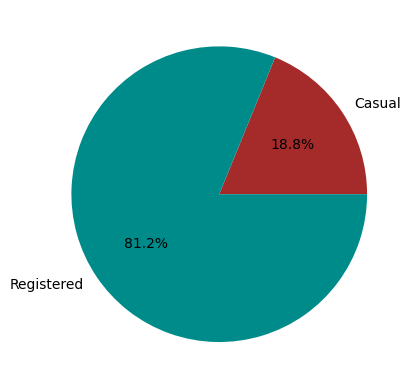

In [ ]:
total_casual = sum(df_day['casual'])
total_registered = sum(df_day['registered'])

data = [total_casual, total_registered]
labels = ['Casual', 'Registered']
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#A52A2A", "#008B8B"])

plt.show()

### Pertanyaan 2: Bagaimana peran cuaca (weathersit) terhadap jumlah penyewaan sepeda?

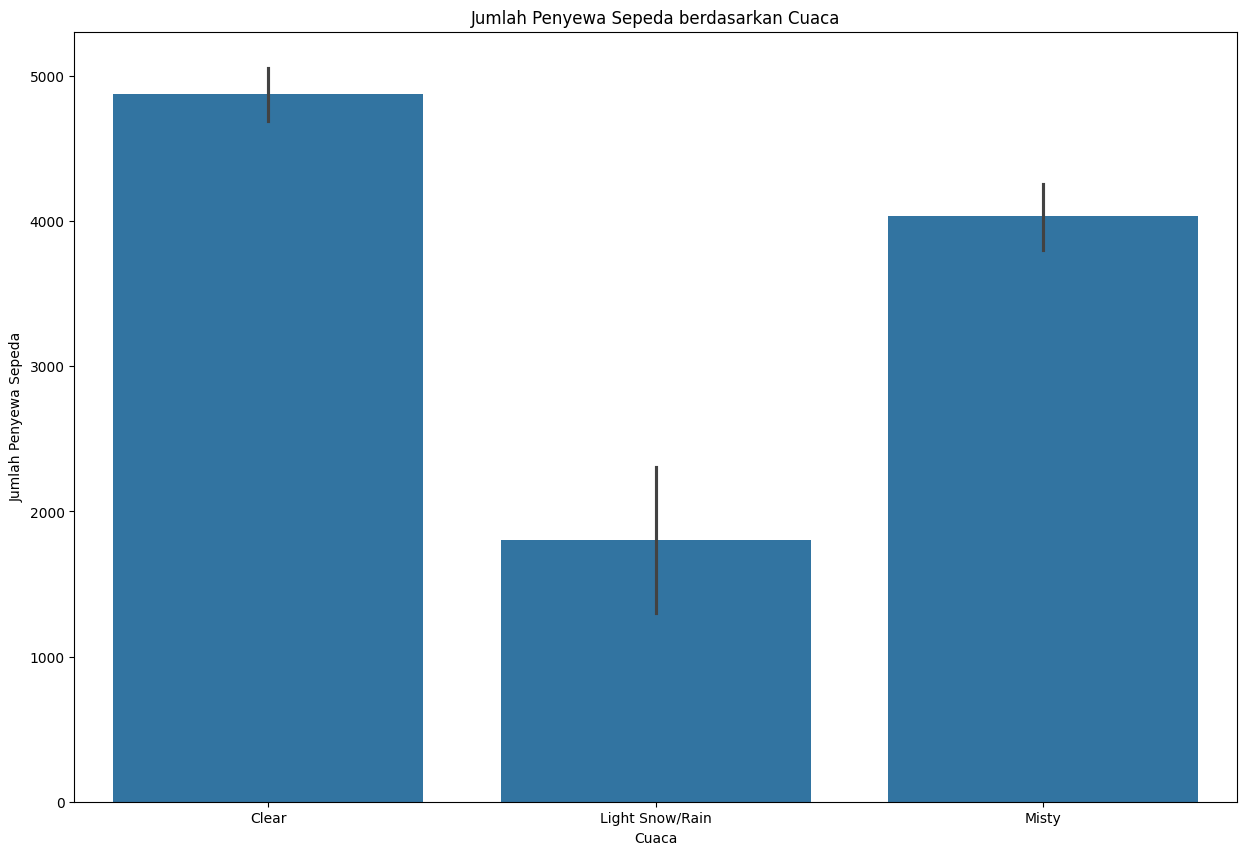

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(
    x='weathersit', y='cnt', data=df_day)

plt.title('Jumlah Penyewa Sepeda berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

### Pertanyaan 3: Bagaimana perubahan tren penyewaan sepeda ketika workingday, weekday, dan holiday?

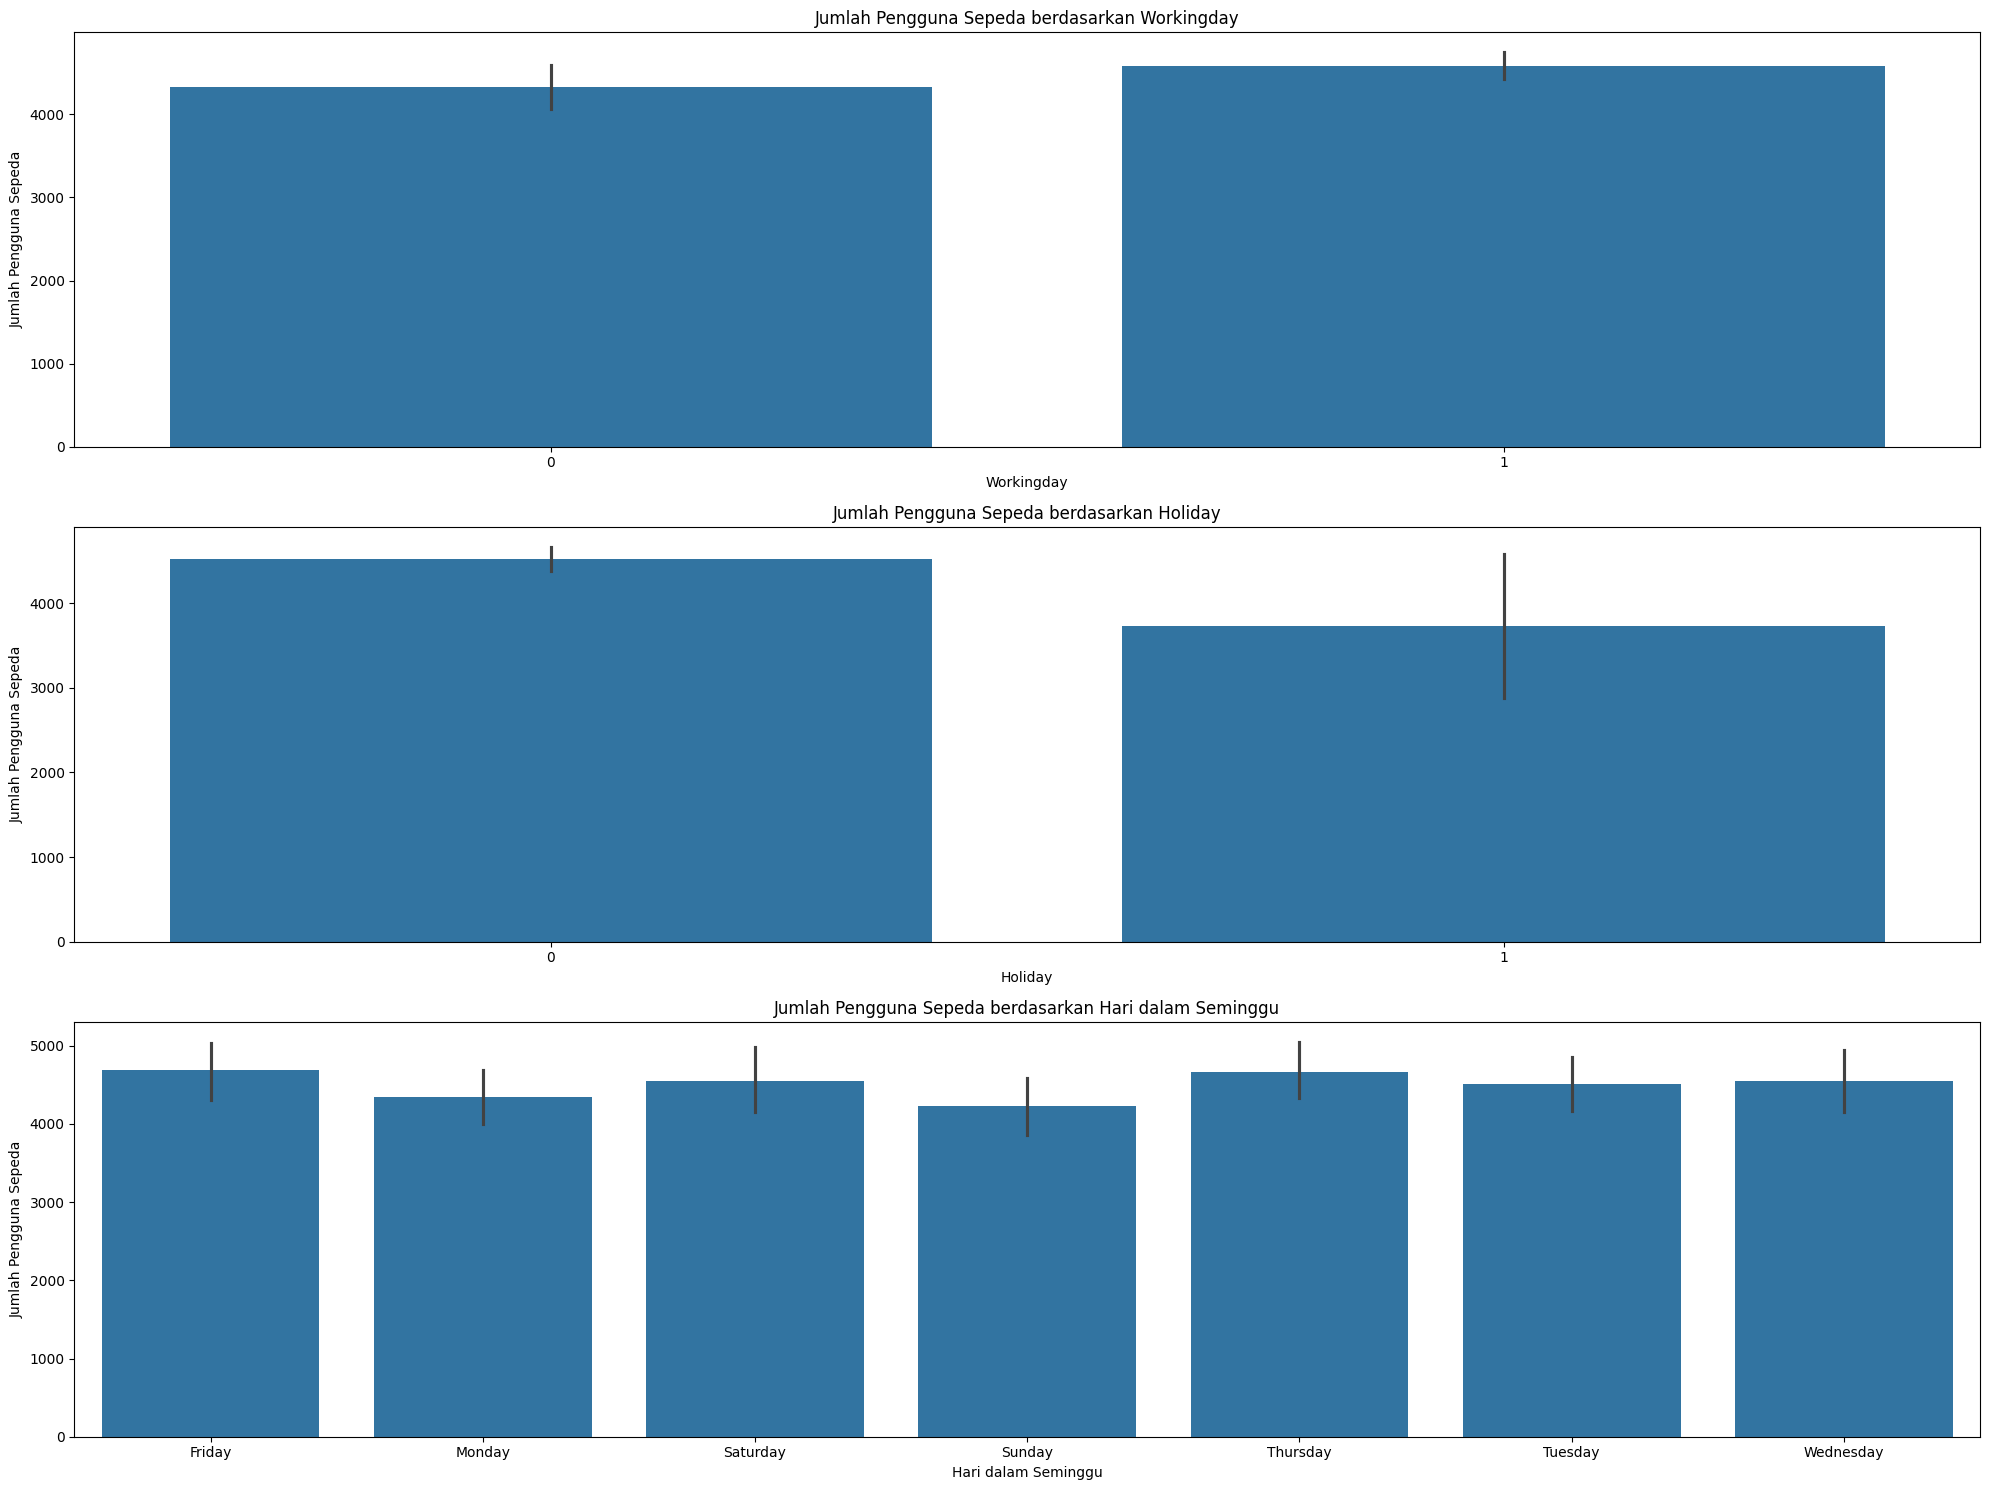

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,15))

data_list = [('workingday', 'Workingday'),
             ('holiday', 'Holiday'),
             ('weekday', 'Hari dalam Seminggu')]

for i, (column, title) in enumerate(data_list):
    sns.barplot(
        x=column, y='cnt', data=df_day, ax=axes[i])
    axes[i].set_title(f'Jumlah Pengguna Sepeda berdasarkan {title}')
    axes[i].set_xlabel(title)
    axes[i].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana tren penyewaan sepeda dalam 1 tahun? Manakah yang lebih unggul antara tahun 2011 atau 2012?

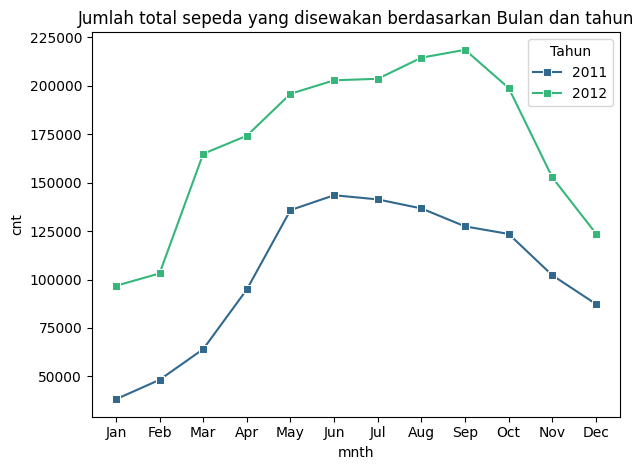

In [ ]:
df_day['mnth'] = pd.Categorical(df_day['mnth'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = df_day.groupby(by=['mnth','yr']).agg({
    'cnt': 'sum'
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x='mnth',y='cnt',hue='yr',palette='viridis',marker='o')

plt.title('Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun')
plt.legend(title='Tahun', loc='upper right')
plt.tight_layout()
plt.show()

## Conclusion

**Conclusion pertanyaan 1**
- Penyewa sepeda yang registered lebih banyak dibandingkan penyewa casual user, yaitu 81.2% untuk registered dan 18.8% untuk casual

**Conclusion pertanyaan 2**
- Cuaca (weathersit) sangat berperan terhadap jumlah penyewaan sepeda. Penyewa sepeda paling tinggi terjadi pada saat cuaca cerah/clear. Sedangkan penyewa sepeda paling rendah terjadi ketika cuaca light snow/rain

**Conclusion pertanyaan 3**
- Penyewa sepeda paling banyak ketika workingday. Penyewa sepeda lebih banyak ketika weekdays daripada holiday. Urutan banyaknya penyewa sepeda dalam seminggu dari yang paling besar dimulai dari hari Fri-Thu-Sat-Wed-Tue-Mon-Sun.

**Conclusion pertanyaan 4**
- Tren penyewaan sepeda pada tahun 2012 lebih banyak daripada tahun 2011. Pada tahun 2011, penyewaan dari awal tahun meningkat, namun mulai bulan Juni penyewaan menurun secara perlahan. Pada tahun 2012, penyewaan dari awal tahun meningkat, namun mulai bulan September penyewaan menurun secara perlahan.




In [104]:
df_day.to_csv("Bike_Share.csv", index=False)

In [105]:
df_hour.to_csv("Bike_Share_hour.csv", index=False)